# Importing Libraries and Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
#Importing Data
df=pd.read_csv(r'C:\Users\Admin\Desktop\CleanDT.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             529 non-null    int64  
 1   Age (yrs)              529 non-null    int64  
 2   Weight (Kg)            529 non-null    float64
 3   Height(Cm)             529 non-null    float64
 4   Blood Group            529 non-null    int64  
 5   Pulse rate(bpm)        529 non-null    int64  
 6   RR (breaths/min)       529 non-null    int64  
 7   Hb(g/dl)               529 non-null    float64
 8   Cycle(R/I)             529 non-null    int64  
 9   Cycle length(days)     529 non-null    int64  
 10  Marraige Status (Yrs)  529 non-null    float64
 11  Pregnant(Y/N)          529 non-null    int64  
 12  No. of aborptions      529 non-null    int64  
 13  FSH(mIU/mL)            529 non-null    float64
 14  LH(mIU/mL)             529 non-null    float64
 15  Hip(in

In [4]:
# CHECKING FOR MISSING VALUES
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
print(df[df.isnull().any(axis=1)][null_columns])

Empty DataFrame
Columns: []
Index: []


# Data Visualisation

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37]),
 [Text(1, 0, 'PCOS (Y/N)'),
  Text(2, 0, 'Age (yrs)'),
  Text(3, 0, 'Weight (Kg)'),
  Text(4, 0, 'Height(Cm)'),
  Text(5, 0, 'Blood Group'),
  Text(6, 0, 'Pulse rate(bpm)'),
  Text(7, 0, 'RR (breaths/min)'),
  Text(8, 0, 'Hb(g/dl)'),
  Text(9, 0, 'Cycle(R/I)'),
  Text(10, 0, 'Cycle length(days)'),
  Text(11, 0, 'Marraige Status (Yrs)'),
  Text(12, 0, 'Pregnant(Y/N)'),
  Text(13, 0, 'No. of aborptions'),
  Text(14, 0, 'FSH(mIU/mL)'),
  Text(15, 0, 'LH(mIU/mL)'),
  Text(16, 0, 'Hip(inch)'),
  Text(17, 0, 'Waist(inch)'),
  Text(18, 0, 'TSH (mIU/L)'),
  Text(19, 0, 'AMH(ng/mL)'),
  Text(20, 0, 'PRL(ng/mL)'),
  Text(21, 0, 'Vit D3 (ng/mL)'),
  Text(22, 0, 'PRG(ng/mL)'),
  Text(23, 0, 'RBS(mg/dl)'),
  Text(24, 0, 'Weight gain(Y/N)'),
  Text(25, 0, 'hair growth(Y/N)'),
  Text(26, 0, 'Skin darkening (Y/N)'),
  Text(27, 0, 

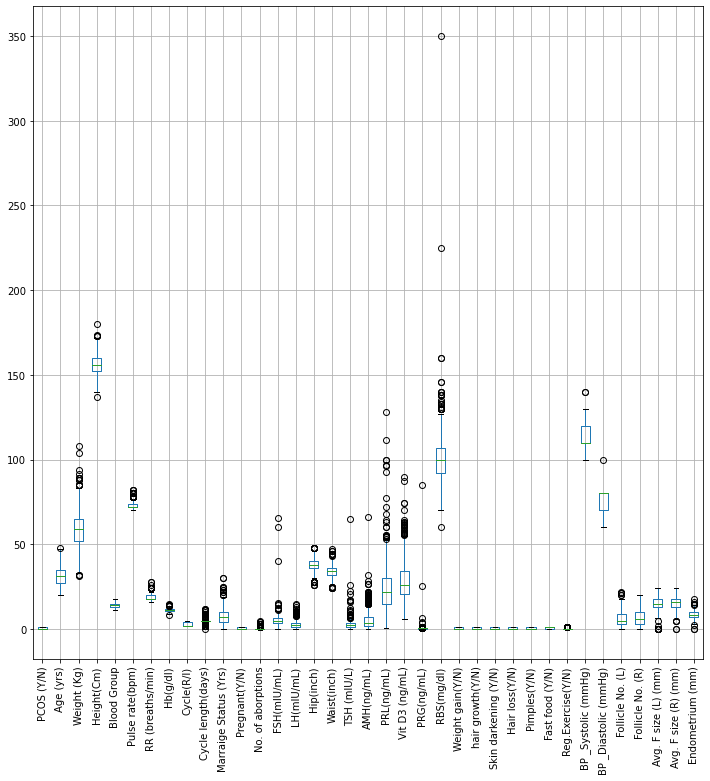

In [26]:
#Plotting Boxplot for Outliers
pd.DataFrame.boxplot(df, figsize=(12,12))
plt.xticks(rotation=90)

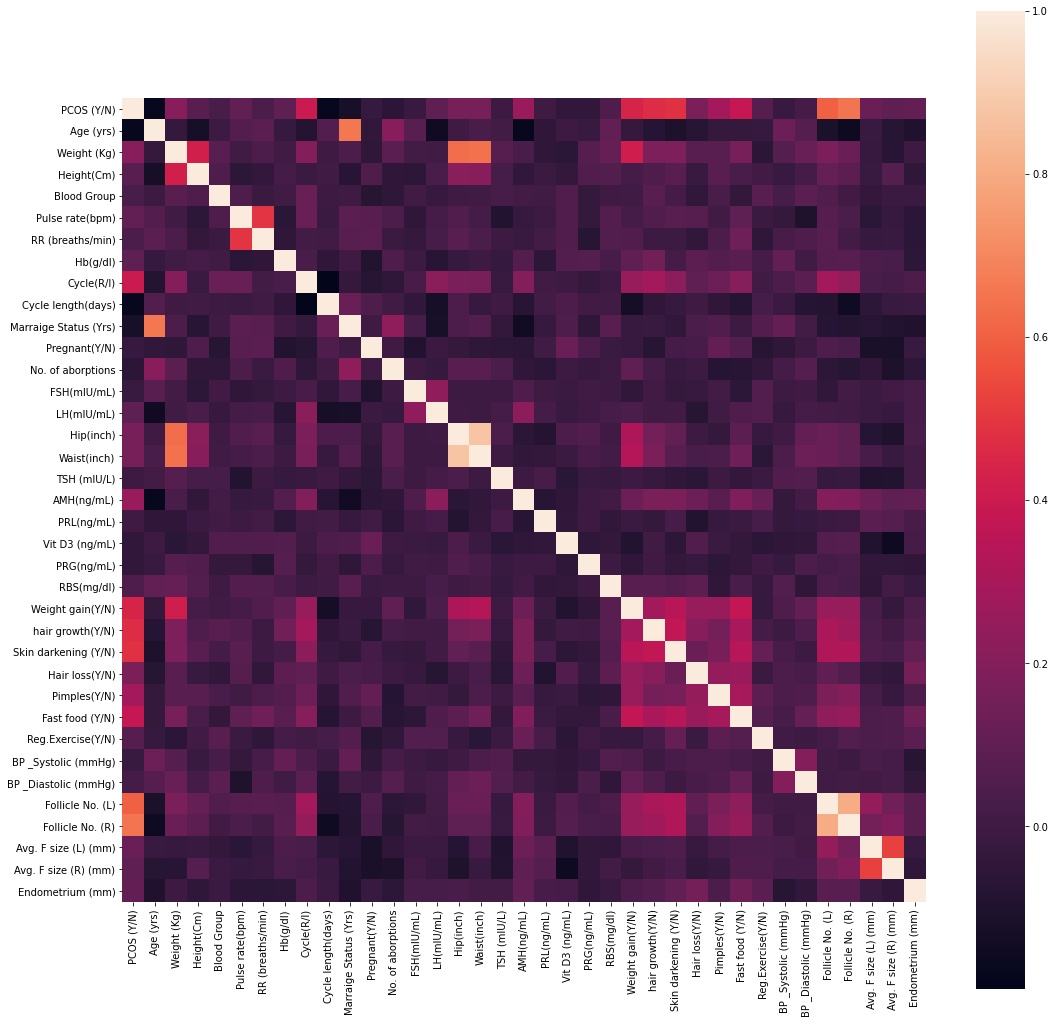

In [5]:
#Examaning the correlation matrix of all the features 
corrmat = df.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat, square=True);

In [6]:
corrmat["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)               1.000000
Follicle No. (R)         0.650025
Follicle No. (L)         0.598711
Skin darkening (Y/N)     0.483023
hair growth(Y/N)         0.469131
Weight gain(Y/N)         0.440847
Cycle(R/I)               0.399442
Fast food (Y/N)          0.384027
Pimples(Y/N)             0.286143
AMH(ng/mL)               0.264041
Weight (Kg)              0.210414
Hair loss(Y/N)           0.175349
Hip(inch)                0.163307
Waist(inch)              0.161852
Avg. F size (L) (mm)     0.126547
Endometrium (mm)         0.105429
Pulse rate(bpm)          0.104106
Avg. F size (R) (mm)     0.095996
Hb(g/dl)                 0.091695
LH(mIU/mL)               0.091355
Height(Cm)               0.076991
Reg.Exercise(Y/N)        0.069558
RBS(mg/dl)               0.047742
RR (breaths/min)         0.038987
Blood Group              0.030158
BP _Diastolic (mmHg)     0.017766
PRL(ng/mL)              -0.002097
TSH (mIU/L)             -0.005168
BP _Systolic (mmHg)     -0.017598
FSH(mIU/mL)   

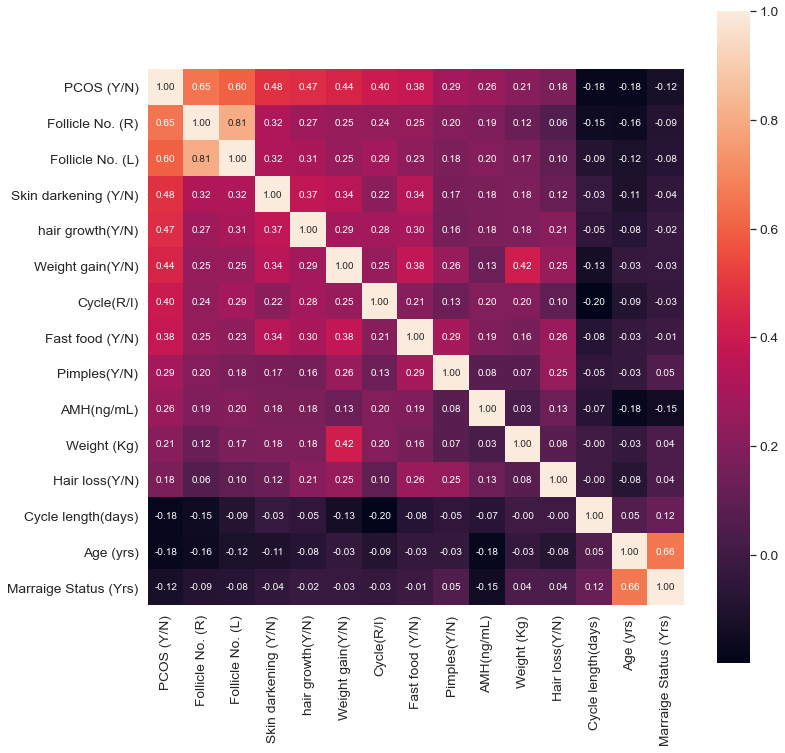

In [27]:
#Having a look at features bearing significant corelation

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Model Building

In [7]:
X = df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"].values
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=23)

# Fitting Radom Forest Classifier

In [8]:
rfc = RandomForestClassifier(n_estimators=9)
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [9]:
print("Random forest model accuracy(in %):", metrics.accuracy_score(y_test, rfc_predict)*100)

Random forest model accuracy(in %): 85.71428571428571


In [10]:
average_accuracy = 0
max = 0
for var in range(0,542):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=var)
    rfc = RandomForestClassifier(n_estimators=9)
    rfc.fit(X_train,y_train)
    # predictions
    rfc_predict = rfc.predict(X_test)
    score = metrics.accuracy_score(y_test, rfc_predict)*100
    if (score > max):
        max = score
    average_accuracy += score
print(average_accuracy/542)
print (max)

87.18608328940427
93.14285714285714


<AxesSubplot:>

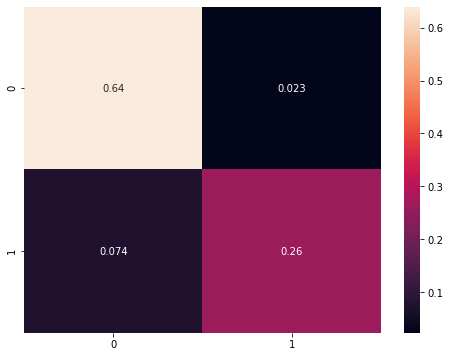

In [11]:
# cofusion matrix for RFC
plt.subplots(figsize=(8,6))
cf_matrix = confusion_matrix(y_test, rfc_predict)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':10})

# Fitting Logistic Regression

In [12]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

import warnings
warnings.filterwarnings('ignore')

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
y_pred = lr.predict(X_test)
print("Logistic Regression model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 86.85714285714286


In [14]:
average_accuracy = 0
max = 0
for var in range(0,542):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=var)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)*100
    if (max < score):
        max = score
    average_accuracy += score

import warnings
warnings.filterwarnings('ignore')

In [15]:
print(average_accuracy/541)
print (max)

87.54264589384738
94.85714285714286


<AxesSubplot:>

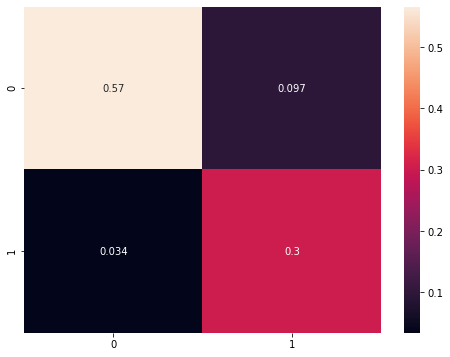

In [16]:
# cofusion matrix for Logistic Regression
plt.subplots(figsize=(8,6))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':10})

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.90       116
           1       0.76      0.90      0.82        59

    accuracy                           0.87       175
   macro avg       0.85      0.88      0.86       175
weighted avg       0.88      0.87      0.87       175



# KNN Classifier

In [18]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)   # Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [19]:
y_pred2 = knn.predict(X_test)

In [20]:
knn.score(X_test, y_test)

0.7257142857142858

In [21]:
print("K nearest neighbours model accuracy(in %):", metrics.accuracy_score(y_test, y_pred2)*100)

K nearest neighbours model accuracy(in %): 72.57142857142857


In [22]:
average_accuracy = 0
max = 0
for var in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=var)
    knn = KNeighborsClassifier(n_neighbors = 2)
    knn.fit(X_train,y_train)
    y_pred2 = knn.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred2)*100
    if (max < score):
        max = score
    average_accuracy += score

In [23]:
print (average_accuracy/100)
print (max)

73.54285714285714
81.14285714285714


<AxesSubplot:>

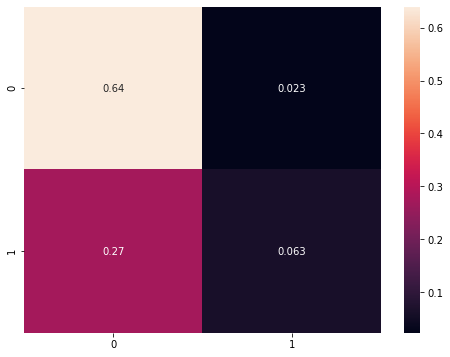

In [24]:
#Confusion Matrixfor KNN
plt.subplots(figsize=(8,6))
cf_matrix = confusion_matrix(y_test, y_pred2)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':10})

In [25]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81       116
           1       0.73      0.19      0.30        59

    accuracy                           0.70       175
   macro avg       0.72      0.58      0.55       175
weighted avg       0.71      0.70      0.64       175

